<a href="https://colab.research.google.com/github/ZarevichMikhail/DM-manual/blob/main/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4%D0%B8%D1%87%D0%BA%D0%B0_%D0%BF%D0%BE_%D0%94%D0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Введение

Пока не готово. Нужно добавить сюда введение и список литературы. Может быть сюда ещё всю теорию по лекциям записать, не знаю, слишком много переписывать выйдет.

Литература и видео, которые показались мне интересными.

1.   Жигалова Е.Ф. Дискретная математика. / Е.Ф. Жигалова. – Томск: Эль Контент, 2014. – 98 с. Наш основной учебник

Ещё несколько интересных учебников.

2. Хаггарти Р. Дискретная математика. Это более простой и понятный учебник. Его можно использовать для первоначального знакомства ДМ.
3. Новиков Ф.А. Дискретная математика для программистов. Это уже более фундаментальный учебник.
4. Кормен. Агоритмы, построение и анализ.
4. https://www.geeksforgeeks.org/dsa/graph-types-and-applications/ - информация про графы на английском языке
5. https://www.youtube.com/playlist?list=PLcsjsqLLSfNAY-pm5c4XZQhSl1U_20itT - Лекции по дм из МГУ
6. Документация на Networkx - https://networkx.org/
7. Документация на Numpy - https://numpy.org/doc/



# Лабораторная работа №1 Генерация графа

## Цель работы


Первая лабораторная работа посвящена знакомству с графами и библиотеками для работы с ними.
Требуется написать программу, которая создаёт матрицу смежности и матрицу инцидентности графа заданного типа, затем выводит рисунок графа.

Формат ввода: тип графа, количество вершин.

Формат вывода: матрица смежности и матрица инцидентности графа, рисунок графа.

## Теория

Граф G — это упорядоченная пара $$G=(V,E)$$, где:

*   V — множество вершин графа.
*   E — множество рёбер. Рёбра представляют собой пары вершин из V.

Пусть $v_1$ и $v_2$ - вершины, $e_1=(v_1,v_2)$ - соединяющее их ребро. Тогда эти вершины называются **смежными**, а соответствующее ребро **инцидентно** своим вершинам. Аналогично определяется инцидентность вершин $v_1,v_2$ ребру $e_1$.


Графы можно классифицировать по различным свойствам, что позволяет выбрать наиболее подходящую модель для конкретной задачи.

*   Неориентированные и ориентированные графы (undirected and directed graphs)
    *   Неориентированный граф: Ребра не имеют направления. Если существует ребро между  $(v_1,v_2)$, то cуществует и $(v_2,v_1)$. Другими словами эти пары мы считаем одинаковыми $(v_1,v_2) = (v_2,v_1)$
    *   Ориентированный граф (орграф): Каждое ребро (в этом случае его часто называют **дугой**) имеет направление от одной вершины к другой. Если есть дуга  $(v_1,v_2)$, это не означает наличие  $(v_2,v_1)$.


*  Взвешенные и невзвешенные графы (weighted and unweighted graphs)
    *   Невзвешенный граф: Все ребра считаются равнозначными.
    *   Взвешенный граф: Каждому ребру присваивается числовое значение, называемое весом. Вес может представлять расстояние, стоимость, время, пропускную способность или любую другую характеристику.


*   Простые графы, мультиграфы и псевдографы
    *   Простой граф: Граф, в котором между любой парой вершин существует не более одного ребра, и отсутствуют петли(ребра, соединяющие вершину саму с собой).
    *   Мультиграф: Граф, в котором допускаются кратные (параллельные) ребра — несколько ребер, соединяющих одну и ту же пару вершин. Во множестве $V$ содержатся несколько одинаковых элементов $(v_1,v_2)$.
    *   Псевдограф: Граф в котором допускаются петли. Во множестве $V$ содержатся элементы $(v_1,v_1)$.


*   Новый пункт





Известны различные способы представления графов в памяти компьютера, кторые различаются объёмом занимаемой памяти и скоростью выполнения операций над графами. Представление выбирается, исходя из потребностей конкретной задачи.  



<font size="5">Матричные представления</font>

Представление при помощи матриц предпочтительнее в случае плотных (dense) графов, когда значение $|E|$ близко к $|V|^2$ , или когда надо иметь возможность быстро определить, имеется ли ребро, соединяющие две данные вершины.

1. Строки и столбцы в матрице смежности (adjacency matrix) обозначают вершины графа. Заполняется матрица следующим образом.

$$M_{ij} =
\begin{cases}
n, & \text{если } x_i \text{ соединена с вершиной } x_j \text{ n рёбрами} \\
0, & \text{если вершины } x_i \text{и } x_j  \text{ не смежны }
\end{cases}$$


2. Строки в матрице инцидентности (incidence matrix) обозначают вершины графа, а столбцы – рёбра.

$$B_{i,j}=
\begin{cases}
1, & \text{если ребро } u_j \text{ инцидентно вершине } x_i \\
2, & \text{если ребро } u_j \text{ - петля в вершине } x_i \\
0, & \text{если ребро } u_j \text{ не инцидентно вершине } x_i.
\end{cases}$$


<font size="5">Списочные представления</font>

Списочные представления более предпочтительны для разреженных (sparse) графов, т.е. таких, для которых $|E|$ гораздо меньше $|V|^2$.

1. Список смежности (adjacency  list)

Список или словарь, где для каждой вершины хранится список её соседей.

2. Список инцидентности (incidence list)

Список рёбер графа.


Пример.


Граф. На рёбрах обозначены их номера для сопоставления с матрицей инцидентности.


![](https://raw.githubusercontent.com/ZarevichMikhail/DM-manual/refs/heads/main/Рис%201.1%20Пример%20графа.png)



```
Матрица смежности
[1, 1, 0, 0, 0]
[1, 0, 1, 1, 1]
[0, 1, 0, 0, 1]
[0, 1, 0, 0, 0]
[0, 1, 1, 0, 0]

Список смежности
{
    1: [1, 2],
    2: [1, 3, 4, 5],
    3: [2, 5],
    4: [2],
    5: [2, 3]
}


Матрица инцидентности
[2, 1, 0, 0, 0, 0]
[0, 1, 1, 1, 1, 0]
[0, 0, 1, 0, 0, 1]
[0, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 1, 1]

Список инцидентности
[
    (1, 1),  # e1
    (1, 2),  # e2
    (2, 3),  # e3
    (2, 4),  # e4
    (2, 5),  # e5
    (3, 5)   # e6
]


```


## Рекомендации по выполнению работы

### Структура программы и оформление кода.

Программа должна иметь следующую структуру.

In [ ]:
import numpy as np               # Библиотека для работы с матрицами
import networkx as nx            # Библиотека для работы с графами
import matplotlib.pyplot as plt  # Визуализация графов
import random
import math
from enum import Enum  # библиотека для создания перечислений


# Перечисление, содержащее типы графов
class GraphTypeEnum(Enum): …


# Создание матрицы смежности
def create_ms(graph_type: "GraphTypeEnum", nodes_number: int) -> np.ndarray: …


# Создание матрицы инцидентности
def create_mi(ms: np.ndarray, nodes_number: int) -> np.ndarray: …


# Вывод матриц
def matrix_output(ms: np.ndarray, mi: np.ndarray) -> None: …


# Вывод графа
def draw_graph(graph: networkx.classes.graph.Graph,  pos: dict) -> None: …


# Вывод графа с кратными рёбрами
def draw_multi_graph(graph: networkx.classes.multigraph.MultiGraph, pos: dict) -> None:
  pass


# Вывод всех доступных графов
def print_menu() -> None:


# Получение типа графа
def get_graph_type() -> GraphTypeEnum:


def main():

    print_menu()

    graph_type = get_graph_type()
    nodes_number = int(input("Введите количество вершин: "))

    ms = create_ms(graph_type, nodes_number)  # Создание матрицы смежности
    mi = create_mi(ms, nodes_number)          # Создание матрицы инцидентности

    matrix_output(ms, mi)             # Вывод матриц в консоль

    if graph_type != GraphTypeEnum.Multigraph:
        G = nx.Graph(ms)             # Создание графа
        pos = nx.circular_layout(G)  # вершины располагаются так, чтобы они лежали на круге.

        draw_graph(G)                # Рисует граф

    else:

        # По умолчанию networkx считает, что на вход графа подаётся весовая матрица.
        # Эта конструкция нужна, чтобы вместо весов были кратные рёбра
        G = nx.from_numpy_array(ms, create_using=nx.MultiGraph(), parallel_edges=True)  # Создание графа с кратными рёбрами
        pos = nx.circular_layout(G, pos)

        draw_multi_graph(G, pos)          # Рисует граф с кратными рёбрами


if __name__ == "__main__":
    main()


Функция `main` нужна для того, чтобы использовать файл и в качестве запускаемого напрямую скрипта, и в качестве библиотеки.


1.   В случае скрипта, файл получит атрибут `__name__ = "__main__"`, поэтому код в функции `main` будет запущен. Это нужно для того, чтобы для тестирования программы не переходить постоянно в другой файл.
2.   В случае импортирования уже готового файла как библиотеки, `__name__`  получит имя своего файла. Код, написанный для тестирования, выполнен не будет.





К каждой функции должны быть добавлены [docstring](https://numpydoc.readthedocs.io/en/latest/format.html) комментарии и [type hints](https://mypy.readthedocs.io/en/stable/cheat_sheet_py3.html)
```python
# Создание матрицы смежности
def create_ms(graph_type: "GraphTypeEnum", nodes_number: int) -> np.ndarray:
    """
    Создает матрицу смежности графа заданного типа.

    Parameters
    ----------
    graph_type: GraphTypeEnum
        Тип графа (например, полный, простой и т.д).

    nodes_number : int
        Количество вершин.

    Returns
    -------
    np.ndarray:
        Матрица смежности размером (nodes_number, nodes_number).

    See Also
    --------
    numpy.zeros : Создание матрицы, заполненной нулями.

    Examples
    --------
    >>> # Создание полного графа
    >>> create_ms(GraphTypeEnum.CompleteGraph, 3)
    array([[0, 1, 1],
           [1, 0, 1],
           [1, 1, 0]])

    >>> # Создание графа с кратными рёбрами
    >>> create_ms(GraphTypeEnum.Multigraph, 3)
    array([[0, 2, 1],
           [2, 0, 1],
           [1, 1, 0]])
    """

```



Docstring комментарии можно будет увидеть в точке вызова функции, наведя курсор на её текст. Это значительно упрощает разработку, так как информацию об использовании функции можно видеть непосредственно при написании кода, не возвращаясь постоянно к документации. Также, в случае, если необходимо написать свою библиотеку, такой формат позволяет создать документацию автоматически, используя специальные программы.

Type hints позволяют сразу увидеть с какими типами данных работает функция. Кроме того, встроенные в IDE анализаторы типов будут проверять соответствие переменных, передаваемых функции, заявленным типам и указывать на неправильное использование.  

### Работа с перечислениями

Перечисления нужны, чтобы заменить целочисленные индексы на понятные имена, за счёт чего повышается читаемость кода.


Пример реализации перечисления на Python.

In [24]:
from enum import Enum  # библиотека для создания перечислений

# Перечисление, содержащее типы графов
class GraphTypeEnum(Enum):
    """
    Перечисление, содержащее типы графов.

    Параметры
    ---------
    CompleteGraph
        Полный граф. Все вершины соединены друг с другом.
    SimpleGraph
        Обыкновенный граф. Без петель и кратных рёбер.
    Multigraph
        Граф с кратными рёбрами.
    GraphWithLoops
        Граф с петлями.
    """

    CompleteGraph  = 1
    SimpleGraph    = 2
    Multigraph     = 3
    GraphWithLoops = 4

# docstring комментарии позволяет прямо в коде посмотреть
# какие существуют типы графов.
graph_type = GraphTypeEnum.CompleteGraph



У элементов перечисления есть атрибуты `.name`, который выводет строкове представление переменной в коде и `.value`, который выводит фактические данные, привязанные к имени.

Перечисления являются итерируемыми объектами. Благодаря этому можно создать меню, содержащее все доступные типы и получать ввод пользователя.

In [22]:
def print_menu():
    print("Выберите тип графа:")

    # Итерация по всем доступным значениям.
    for graph_type in GraphTypeEnum:
        print(graph_type.value, "-", graph_type.name)
    print("\n")

def get_graph_type() -> GraphTypeEnum:
    choice = int(input("Тип графа: "))

    # К номеру choice будет привязано соответствующее значение перечисления.
    # Ввод несуществующего значения вызовет ошибку AttributeError
    return GraphTypeEnum(choice)

print_menu()
graph_type = get_graph_type()

# Далее в коде к типу графа можно обращаться по имени, а не по номеру
if graph_type == GraphTypeEnum.CompleteGraph:
    # Код, обрабатывающий этот случай.
    print(graph_type == GraphTypeEnum.CompleteGraph)

    print(type(graph_type))
    print(graph_type.value)
    print(graph_type.name)

Выберите тип графа:
1 - CompleteGraph
2 - SimpleGraph
3 - Multigraph
4 - GraphWithLoops


Тип графа: 1
True
<enum 'GraphTypeEnum'>
1
CompleteGraph


### Вывод графа на экран

Пример реализации функции `draw_graph`

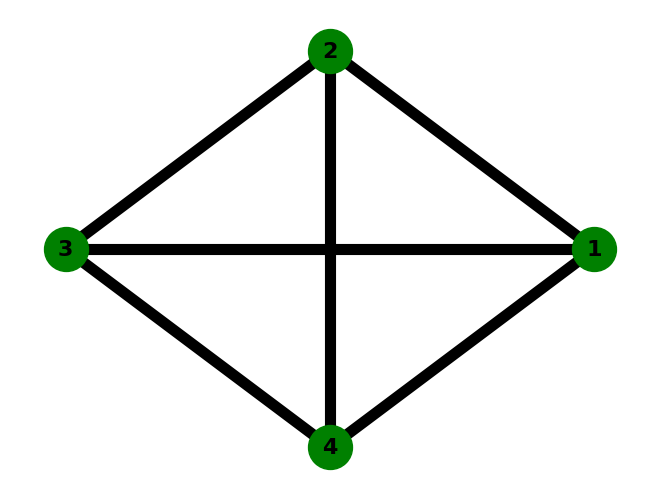

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Матрица смежности должна быть получена в результате выполнения функции, например:
# ms = create_ms(nodes, type)
# Матрица инцидентности, которая создаётся на основе матрицы смежности
# mi = create_mi(ms)

# Пример полученной матрицы
ms = [[0, 1, 1, 1],
      [1, 0, 1, 1],
      [1, 1, 0, 1],
      [1, 1, 1, 0]]
ms = np.array(ms)



G = nx.Graph(ms)             # Создание графа
pos = nx.circular_layout(G)  # вершины располагаются так, чтобы они лежали на круге.

# Эта часть кода должна быть в функции DrawGraph

# Будет удобнее начать нумерацию вершин с единицы
node_labels = {}
for i in G.nodes():
    node_labels[i]= i+1

# Функция, рисующая граф
nx.draw(G, pos, node_size = 1000, width = 8, with_labels = True, labels = node_labels, font_size=16, font_weight = 'bold', node_color = "green")

plt.savefig("SimpleGraph.png") # Сохраняет рисунок графа в текущую директорию
plt.show()


Пример реализации функции `draw_multi_graph`

[(0, 1, 0), (0, 1, 1), (0, 3, 0), (1, 2, 0), (1, 2, 1), (1, 2, 2), (1, 3, 0), (2, 3, 0)]


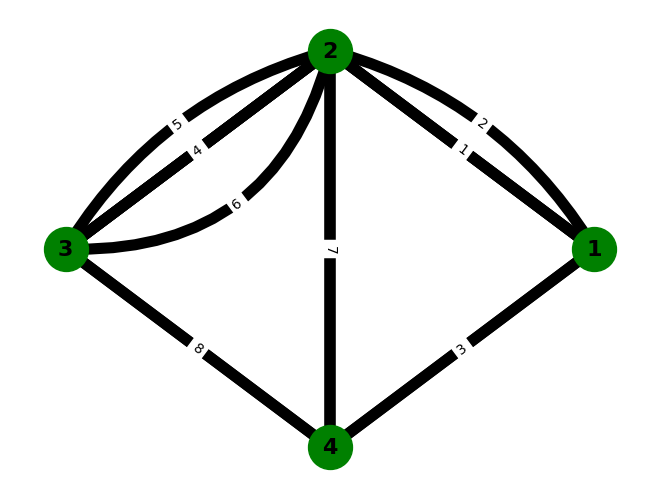

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np


ms = [[0, 2, 0, 1],
      [2, 0, 3, 1],
      [0, 3, 0, 1],
      [1, 1, 1, 0]]


ms = np.array(ms)

# По умолчанию networkx считает, что на вход графа подаётся весовая матрица.
# Эта конструкция нужна, чтобы вместо весов были кратные рёбра
G = nx.from_numpy_array(ms, create_using=nx.MultiGraph(), parallel_edges=True)
pos = nx.circular_layout(G)

# Можно вывести все рёбра и увидеть, что каждому кратному ребру присвоен ключ
print(G.edges(keys = True))

# Эта часть кода должна быть в функции DrawMultiGraph

node_labels = {}
for i in G.nodes():
    node_labels[i] = i + 1


nx.draw(G, pos, node_size = 1000, width = 8, with_labels = True, labels = node_labels, font_size=16, font_weight = 'bold', node_color = "green")
#nx.draw_networkx_nodes(G.nodes, pos, node_color="green", node_size=1000)
#nx.draw_networkx_labels(G, pos, node_labels, font_size=16, font_weight='bold')

# Счётчик рёбер
edge_number = 1

for i, j, key in G.edges(keys = True):

    # текущее ребро между вершинами i j и его название
    current_edge = (i, j)
    label = {current_edge: edge_number}

    # Вычисление изгиба дуги.
    # В случае, если только одно ребро, изгиба не будет.
    # А если их несколько, то каждое следующее ребро будет изгибаться сильнее.
    rad = 0.2 * key
    if key % 2 == 0:
        rad = -rad  # Для красоты сделал изгиб в обе стороны

    # Стиль соединения
    connection_style = "arc3,rad="+str(rad)

    # Рисует ребро с заданным изгибом
    nx.draw_networkx_edges(G, pos, edgelist=[current_edge], width=8, connectionstyle=connection_style)
    nx.draw_networkx_edge_labels(G, pos, label, connectionstyle=connection_style)

    edge_number +=1

plt.savefig("MultiGraph.png")
plt.show()

# Лабораторная работа №2 Метрики графа

## Цель работы

В 1 лабораторной работе требуется написать программу, которая создаёт матрицу смежности и матрицу инцидентности графа заданного типа, затем выводит рисунок графа.

Формат ввода: тип графа, количество вершин.

Формат вывода: матрица смежности, матрица инцидентности, матрица метрики графа, радиус, диаметр, центральные и периферийные вершины, рисунок графа.


## Теория

Для определения маршрутов длины $q$ в графе $G = (X,U)$ его матрицу смежности $MS$ возводят в степень, равную $q$. Тогда для каждого значения степени $q = 1,2,...,k$ значение элемента $(ms_{ij})_q$ матрицы $MS^q$ определяет количество маршрутов $\mu_{ij}$ длиной, равной значению степени $q$.

---
Алгоритм заполнения матрицы метрики.

Шаг 1. Задаём матрицу метрики $M=(m_{ij})_{n \times n}$. Размерность матрицы $M$ равна размерности матрицы $MS$. Все элементы $m_{ij}$ матрицы $M$ не определены.

Шаг 2. Начальное значение степени $k$ матрицы $MS$ равно $1$, всем элементам матрицы $M$ присваиваем значение $0$.

Шаг 3. Всем элементам $m_{ij}$, значения которых не определены, присвоить значение степени $k$, если соответствующие им элементы матрицы $MS^k \neq 0$. (Значения элементов $m_{ij}$ определяются только один раз.)

Шаг 4. Повышаем степень $k$ матрицы $S$: $k = k+1$.

Шаг 5. Проверяем, является ли матрица $MS^{k-1}$ устойчивой.
Если матрица $MS^{k-1}$ неустойчива, то переходим к шагу 3.
Иначе переходим к шагу 6.

Шаг 6. Всем элементам $m_{ij}$ матрицы $M$, значения которых остались неопределёнными, присваиваем значение $\infty$ (бесконечность).

Шаг 7. Матрица метрики $M$ построена.

Конец алгоритма.

Примечание: Элементам $\{m_{ij}\}$ значения присваиваются только один раз. Следовательно, если значение элемента $m_{ij}$ уже определено, то оно больше не меняется.

Радиус графа определяется по матрице метрики следующим способом: в каждой строке матрицы $M$ выделяется значение максимального элемента.
Наименьшее из выделенных значений - величина радиуса графа.

Диаметр графа также определяется по матрице метрики $M$ следующим способом: в каждой строке матрицы $M$ выделяется значение максимального элемента.
Наибольшее из выделенных значений - величина диаметра графа.

Рассмотрим проверку на устойчивое состояние. Оно возникает, когда в графе имеются изолированные вершины, в этом случае шаги 3-4 зациклятся.

Перед выполнением алгоритма следует прибавить к матрице смежности единичную матрицу. На матрицу метрики это не повлияет, но значительно упростит проверку, так как не будет влиять на положение нулей.


Если в графе есть изолированные вершины, то после того, как расстояния до неизолированных вершин будут найдены, при возведении матрицы смежности в следующую степень, положение нулей, по сравнению со старой, не изменится. Следовательно устойчивое состояние будет выполнено и нужно выходить из цикла. Радиус и диаметр в этом случае будет равен бесконечности. Все вершины будут одновременно и центральными и периферийными.


# Лабораторная работа №3 Раскраска графа

## Цель работы

Необходимо реализовать раскраску графа методом Магу-Вейсмана.


Формат ввода: тип графа, количество вершин.


Формат вывода: матрица смежности, матрица инцидентности, список вершин, которым нужно присвоить один цвет, хроматическое число, раскрашенный граф.

## Теория



**Правильной раскраской** графа называется такая раскраска, при которой никакие две смежные вершины не имеют один цвет.

**Хроматическое число графа**  $\chi(G)$ — минимальное количество цветов, которое необходимо для правильной раскраски.



Алгоритм Магу-Вейсмана для нахождения пустых подграфов.

1. Построить скелет графа.
2. Построить матрицу инцидентности графа.
3. Ввести систему логических переменных $x_1, x_2, . . ., x_i, . . ., x_n$, подчинив её условиям, вытекающим из законов булевой алгебры: $x^2_i = x_i, x_i + 1 = 1$ и т.д.
4. Составить произведение $$P_G = \prod_{j=1}^{m} \sum_{i=1}^{n} a_{ij} x_i$$
где $a_{ij}$ – элемент матрицы инцидентности графа $G$.

5. Привести его к дизъюнктивной нормальной форме.
В результате выполненных преобразований выражение $P_G$ будет иметь минимальную форму и представлять выражение суммы произведений переменных из множества вершин $x_1, x_2, . . ., x_i, . . ., x_n$, т. е. многочлен.

6. Для каждого слагаемого многочлена P_G выделить переменные, которые в него не входят, но входят в множество всех вершин графа. Эти переменные порождают максимальные пустые подграфы данного графа G, так как соответствующие им вершины в графе G образуют максимальные пустые подграфы.


Алгортим раскраски.



1. Упорядочить все максимальные пустые подмножества $X1, X2, X3, . . ., Xi, . . ., Xk$ графа $G$ в порядке возрастания их кардинальных чисел $∣Xi∣$.
2.   Выбрать подмножество $Xi$, имеющее наибольшее значение кардинального числа. Если таких подмножеств несколько, надо выбрать из них то, в котором сумма степеней вершин, составляющих множество, максимальна.
3. Присвоить цвет всем вершинам, входящим в множество.
4. Вычеркнуть из других подмножеств вершины, которым присвоен цвет.
5. Исключить из дальнейшего рассмотрения подмножество $Xi$.
6. Если семейство пустых подмножеств $X1, X2, X3, . . .Xi, . . ., Xk$ пусто, то перейти к шагу 9, иначе — к шагу 7.
7. Из оставшихся подмножеств $X1, X2, X3, . . .Xi, . . ., Xk$ аналогично пункту 2 выбрать следующее множество, и присвоить вершинам, входящим в него, цвет, который ещё не использовался.
8. Выполнять пункты 4-6 до тех пор, пока граф не будет раскрашен.
9. Посчитать количество цветов.



## Пример работы алгоритма.
Найти раскраску вершин графа.

```
ms = [[0, 1, 1, 1, 0, 1, 1],
      [1, 0, 1, 1, 1, 0, 1],
      [1, 1, 0, 1, 1, 1, 0],
      [1, 1, 1, 0, 0, 1, 0],
      [0, 1, 1, 0, 0, 0, 1],
      [1, 0, 1, 1, 0, 0, 0],
      [1, 1, 0, 0, 1, 0, 0]]

```
![](https://raw.githubusercontent.com/ZarevichMikhail/DM-manual/refs/heads/main/Рис%203.1%20Граф%2C%20который%20надо%20раскрасить.png)




1. Граф без петель и кратных рёбер, поэтому этап создания скелета пропускаем.

2. Составляем произведение и приводим его к ДНФ.
$$P_G = (x1+x2)*(x1+x3)*(x1+x4)*(x1+x6)*(x1+x7)*(x2+x3)*(x2+x4)*(x2+x5)*(x2+x7)* (x3+x4)*(x3+x5)*(x3+x6)*(x4+x6)*(x5+x7) =
 x1*x2*x3*x4*x5 + x1*x2*x3*x4*x7 + x1*x2*x3*x5*x6 + x1*x2*x3*x6*x7 + x1*x2*x4*x5*x6 + x1*x3*x4*x5*x7 + x2*x3*x4*x6*x7 $$

3. Для каждого слагаемого преобразованного выражения запишем те элементы, которых не хватает до полного множества вершин, получим множество вершин пустых подграфов. Обозначим его за $S$.
$$S = ((6, 7), (5, 6), (4, 7), (4, 5), (3, 7), (2, 6), (1, 5))$$

4. Все множества уже имеют одинаковую мощность, поэтому упорядочим их тут только по убыванию суммы степеней.

$$S = ((1, 5), (2, 6), (3, 7), (4, 7), (4, 5), (6, 7), (5, 6))$$

5. Присвоим вершинам **1 и 5** красный цвет, уберём это множество из множества вершин, также уберём из оставшихся множеств вершины 1 и 5.
Новое множество S
$$S = ((2, 6), (3, 7), (4, 7), (4), (6, 7), (6))$$

6. Вершинам **2 и 6** присвоим зелёный цвет и проделаем то же самое.
$$S = ((3, 7), (4, 7), (4), (7))$$

7. Аналогичным образом действуем с вершинами **3 и 7**, присваивая им оранжевый цвет. У нас останется только вершина **4**, которую окрасим синим, после чего множество станет пустым.

![](https://raw.githubusercontent.com/ZarevichMikhail/DM-manual/refs/heads/main/Рис%203.2%20Раскрашенный%20граф.png)




## Пример кода, реализующего раскраску.

[[3, 4, 6], [2, 5], [1]]


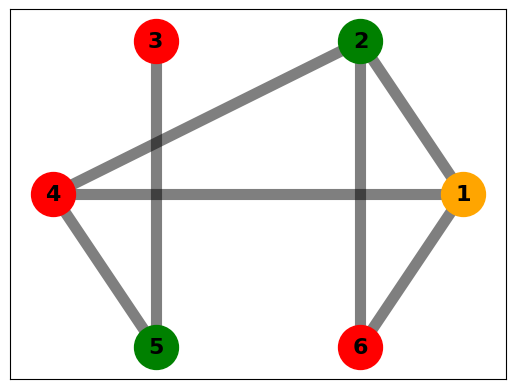

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
import math
import bokeh.palettes # Библиотека со списком цветов


# функция для поиска суммы степеней множества вершин
def search_vertex_power(nodes_list: list, ms: np.ndarray) -> int:
    """Получает на вход подмножество вершин в виде списка, возвращает число - сумму степеней вершин

    Parameters
    ---------
    nodes_list:
        Подмножество вершин в виде списка

    Returns
    -------
    int:
        Сумма степеней вершин, составляющих множество
    """
    nodes_number = len(ms[0])
    power_sum = 0
    for i in nodes_list: # i - текущая строка
        for j in range(nodes_number):
            power_sum += ms [int(i) - 1] [j] # i-1 - текущая строка
    return power_sum


ms = [[0, 1, 0, 1, 0, 1],
      [1, 0, 0, 1, 0, 1],
      [0, 0, 0, 0, 1, 0],
      [1, 1, 0, 0, 1, 0],
      [0, 0, 1, 1, 0, 0],
      [1, 1, 0, 0, 0, 0]]


# Список с вершинами, которым нужно присвоить один цвет
# будет получен в результате алгоритма Магу-Вейсмана
same_color_nodes = [[1], [3, 4, 6], [2, 5]]

# Сортировка сначала по длине, потом по сумме степеней
same_color_nodes = sorted(same_color_nodes, reverse = True, key=lambda x: (len(x), search_vertex_power(x)))
print(same_color_nodes)

# Можно взять уже готовый список цветов
colors = bokeh.palettes.Category20[20]
# Однако, если цветов нужно больше, или же требуется расположить их в определённом порядке, придётся записать их вручную.
colors = ["red", "green", "orange", "blue", "yellow", "violet", "purple", "pink", "grey", "magenta"]

G = nx.Graph(np.array(ms))
pos = nx.circular_layout(G)

node_labels = {}
for i in G.nodes():
    node_labels[i]= i+1

# Для удобства проверки работы алгоритма нумерация была сделана с единицы
# Но, чтобы раскраска работала правильно, необходимо, чтобы она начиналась с нуля
for i in range(len(same_color_nodes)):
    for j in range(len(same_color_nodes[i])):
        same_color_nodes[i][j] = same_color_nodes[i][j]-1

# Каждый новый список вершин рисует новым цветом
for i in range(len(same_color_nodes)):
    nx.draw_networkx_nodes(same_color_nodes[i], pos, node_color=colors[i], node_size=1000)

nx.draw_networkx_edges(G, pos, width = 8, alpha = 0.5)
nx.draw_networkx_labels(G, pos, node_labels, font_size=16, font_weight = 'bold')

plt.savefig("ColoredGraph.png")
plt.show()


Вот, кому интересно, список из 104 цветов, нашёл его тут http://godsnotwheregodsnot.blogspot.com/2012/09/color-distribution-methodology.html.


`colors = ["#A1C299", "#FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#008941", "#006FA6", "#A30059","#FFDBE5", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87", "#5A0007", "#809693", "#FEFFE6", "#1B4400", "#4FC601", "#3B5DFF", "#4A3B53", "#FF2F80", "#61615A", "#BA0900", "#6B7900", "#00C2A0", "#FFAA92", "#FF90C9", "#B903AA", "#D16100", "#DDEFFF", "#000035", "#7B4F4B", "#000000", "#300018", "#0AA6D8", "#013349", "#00846F", "#372101", "#FFB500", "#C2FFED", "#A079BF", "#CC0744", "#C0B9B2", "#C2FF99", "#001E09", "#00489C", "#6F0062", "#0CBD66", "#EEC3FF", "#456D75", "#B77B68", "#7A87A1", "#788D66", "#885578", "#FAD09F", "#FF8A9A", "#D157A0", "#BEC459", "#456648", "#0086ED", "#886F4C", "#34362D", "#B4A8BD", "#00A6AA", "#452C2C", "#636375", "#A3C8C9", "#FF913F", "#938A81", "#575329", "#00FECF", "#B05B6F", "#8CD0FF", "#3B9700", "#04F757", "#C8A1A1", "#1E6E00", "#7900D7", "#A77500", "#6367A9", "#A05837", "#6B002C", "#772600", "#D790FF", "#9B9700", "#549E79", "#FFF69F", "#201625", "#72418F", "#BC23FF", "#99ADC0", "#3A2465", "#922329", "#5B4534", "#FDE8DC", "#404E55", "#0089A3", "#CB7E98", "#A4E804", "#324E72", "#6A3A4C"]`

# Лабораторная работа №4 Алгоритм Дейкстры.

## Цель работы

Реализовать алгоритм Дейкстры для нахождения кратчайшего пути от стартовой вершины до всех остальных в ориентированном графе.

Формат ввода: количество вершин, стартовая вершина.

Формат вывода: матрица смежности ориентированного графа, список с расстояниями от стартовой вершины до остальных, вершины, через которые проходит кратчайший путь, рисунок графа.

## Теория

Если задан орграф $G(V,E)$, в котором дуги нагружены числами (эти числа обычно называют весами, или длинами дуг), то этот граф можно представить в виде **матрицы весов** (длин) C:

$$C{ij} =
\begin{cases}
0, & \text{для } i = j, \\
c_{ij}, & \text{конечная величина, если есть дуга из узла } i \text{ в узел } j, \\
\infty, & \text{если нет дуги из узла } i \text{ в узел } j.
\end{cases}$$

Длиной пути называется сумма длин дуг, входящих в этот путь. Наиболее часто на практике встречается задача отыскания кратчайшего пути.



Алгоритм Дейкстры представляет собой **жадный алгоритм** т.е. такой, который для решения задачи оптимизации на каждом этапе своего выполнения делает локально оптимальный выбор в надежде, что итоговое решение окажется глобально оптимальным.

**Алгоритм Дейкстры** — алгоритм для поиска кратчайшего пути от одной вершины до всех остальных вершин во взвешенном графе, в том случае, когда веса рёбер неотрицательны.

Введём следующие переменные:

`distances` - список расстояний от стартовой вершины до остальных.

`visited` - список посещённых вершин.

`unvisited` - список непосещённых вершин.


1. Все вершины помещаются в множество `unvisited`. Расстояние до всех вершин, кроме начальной, равно бесконечности.
2. Цикл по вершинам в `unvisited`.


    Пока unvisited не пусто:
    1. Найти в unvisited вершину с наименьшим расстоянием до начальной.
    2. Найти расстояние от этой вершины до всех её соседей. Если оно меньше, чем расстояние, уже записанное для этого соседа в списке, то его нужно обновить.
    3. Переместить её в visited.

Работу алгоритма можно значительно ускорить, если вместо множества `unvisited` использовать структура данных `min-heap`, реализуемую с помощью библиотеки `heapq`.

## Пример создания матрицы весов и вывода ориентированного графа

Дуги и их веса: 
 {(0, 1): np.float64(2.0), (0, 3): np.float64(3.0), (1, 2): np.float64(7.0), (1, 3): np.float64(1.0), (1, 4): np.float64(10.0), (4, 0): np.float64(3.0)}
Матрица весов
[[inf  2. inf  3. inf]
 [inf inf  7.  1. 10.]
 [inf inf inf inf inf]
 [inf inf inf inf inf]
 [ 3. inf inf inf inf]]


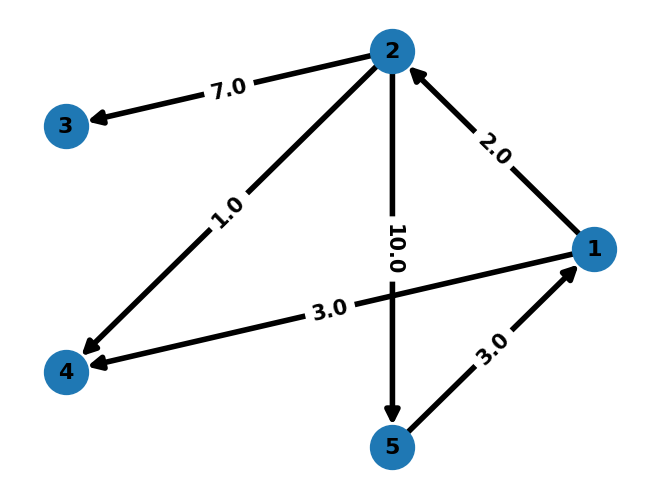

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import math
import random

ms = [[0, 1, 0, 1, 0],
      [0, 0, 1, 1, 1],
      [0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0],
      [1, 0, 0, 0, 0]]

nodes_number = 5

# Матрица весов
# Она должна быть float, т.к. этот тип имеет math.inf
mv = np.zeros((nodes_number, nodes_number), float)

# заполнение матрицы
weights = dict()
for i in range(nodes_number):
    for j in range(nodes_number):
        # Если в матрице смежности есть дуга присваевает ей вес
        if ms[i][j]!= 0:
              mv[i][j] = random.randint(1,10)
              tuple = i, j
              weights[tuple] = mv[i][j]
        else:
          mv[i][j] = math.inf

print("Дуги и их веса: \n", weights)
print("Матрица весов")
print(mv)

# Для ориентированных графов используется DiGraph
G = nx.DiGraph(np.matrix(ms))
pos = nx.circular_layout(G)

labels = {}
for i in G.nodes():
    labels[i]= i+1

nx.draw(G,pos, font_weight = 'bold', node_size = 1000, width = 4,arrowsize = 20, arrowstyle = "-|>")
nx.draw_networkx_labels(G, pos, labels, font_size=16, font_weight = 'bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels = weights, font_size=15, font_weight = 'bold')

plt.show()
